# AutoEncoder (AE)

In this notebook, we use a dense Autoencoder to detect anomalous transactions in the **Credit Card Fraud Detection dataset**. The model is trained exclusively on **normal transactions**, so unusually high reconstruction errors indicate potential fraud.  

## Importing Libraries

In [1]:
# Data handling 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

## Data Loading and Exploration

In [2]:
# Load the dataset
df = pd.read_csv("./data/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Basic info about datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check for missing values
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Basic statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


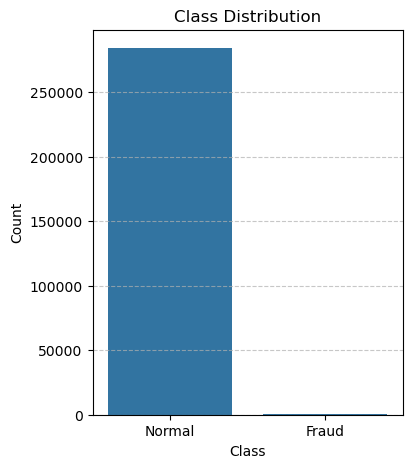

In [6]:
# Check class distribution (fraud vs. non-fraud)
print("\nClass distribution:\n", df["Class"].value_counts())

# Plot distribution
plt.figure(figsize=(4,5))
sns.countplot(x='Class', data=df)

plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The dataset is **highly imbalanced**, with **284,315 normal transactions (Class 0)** and only **492 fraudulent transactions (Class 1)**. This extreme imbalance highlights the challenge of fraud detection and motivates the use of anomaly detection techniques like AutoEncoders.

### Handling Class Imbalance

For Autoencoders:
- We **train only on the majority class (normal transactions)**.
- The idea is that the model learns to reconstruct *normal patterns* well, but struggles with frauds, producing higher reconstruction errors for them.

So instead of resampling, the **imbalance is handled by design**of the Autoencoder approach.

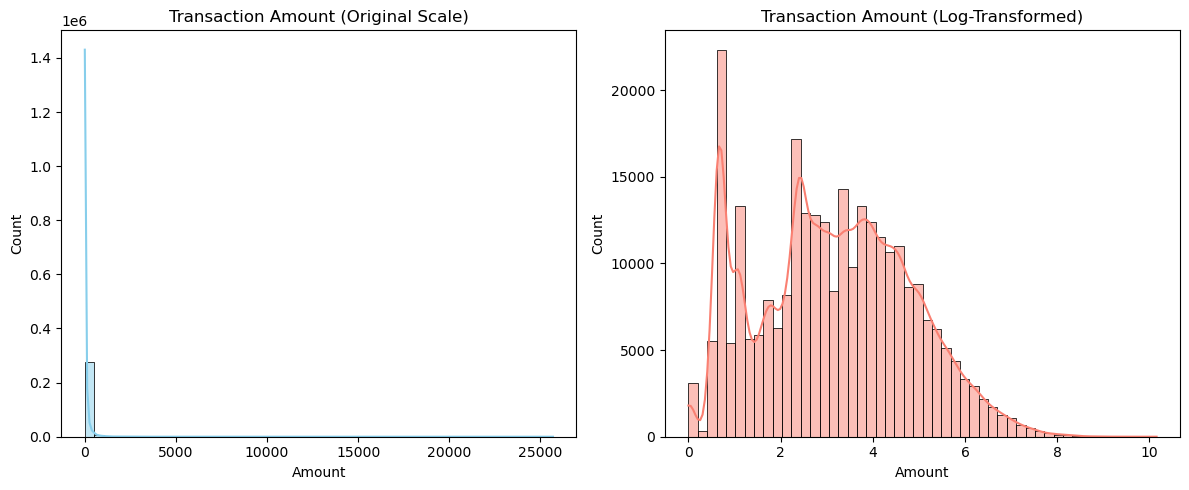

In [7]:
# Compare Amount distribution before and after log transform
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["Amount"], bins=50, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Transaction Amount (Original Scale)")

sns.histplot(np.log1p(df["Amount"]), bins=50, kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Transaction Amount (Log-Transformed)")

plt.tight_layout()
plt.show()

**Left plot**: Highly skewed distribution of raw transaction amounts.

**Right plot**: Log transformation compresses the long tail and makes it much closer to Gaussian, which is better for scaling + training.

## Preprocessing

In [8]:
# Drop irrelevant columns
df.drop(['Time'], axis=1, inplace=True)

# Log-transform 'Amount' to reduce skew, then standardize
df["Amount"] = np.log1p(df["Amount"])

# Separate features and labels
X = df.drop("Class", axis=1).values
y = df["Class"].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split only normal transactions into train/test
X_train_normal, X_val_normal = train_test_split(X_scaled[y == 0], test_size=0.2, random_state=27)

# For test set: combine validation normals + all fraud
X_test = np.vstack([X_val_normal, X_scaled[y == 1]])
y_test = np.hstack([np.zeros(len(X_val_normal)), np.ones(sum(y == 1))])

print("Training shape:", X_val_normal.shape)
print("Test shape:", X_test.shape, "| Labels:", len(y_test))
print("Fraud cases in test set:", sum(y_test))

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_normal, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

Training shape: (56863, 29)
Test shape: (57355, 29) | Labels: 57355
Fraud cases in test set: 492.0


## AE Model: Training and Evaluation

Epoch [1/100], Loss: 1.197263
Epoch [2/100], Loss: 1.196235
Epoch [3/100], Loss: 1.195182
Epoch [4/100], Loss: 1.194102
Epoch [5/100], Loss: 1.192994
Epoch [6/100], Loss: 1.191857
Epoch [7/100], Loss: 1.190688
Epoch [8/100], Loss: 1.189487
Epoch [9/100], Loss: 1.188249
Epoch [10/100], Loss: 1.186972
Epoch [11/100], Loss: 1.185653
Epoch [12/100], Loss: 1.184287
Epoch [13/100], Loss: 1.182870
Epoch [14/100], Loss: 1.181394
Epoch [15/100], Loss: 1.179852
Epoch [16/100], Loss: 1.178234
Epoch [17/100], Loss: 1.176532
Epoch [18/100], Loss: 1.174737
Epoch [19/100], Loss: 1.172840
Epoch [20/100], Loss: 1.170834
Epoch [21/100], Loss: 1.168708
Epoch [22/100], Loss: 1.166455
Epoch [23/100], Loss: 1.164066
Epoch [24/100], Loss: 1.161533
Epoch [25/100], Loss: 1.158848
Epoch [26/100], Loss: 1.156002
Epoch [27/100], Loss: 1.152986
Epoch [28/100], Loss: 1.149793
Epoch [29/100], Loss: 1.146414
Epoch [30/100], Loss: 1.142840
Epoch [31/100], Loss: 1.139065
Epoch [32/100], Loss: 1.135083
Epoch [33/100], L

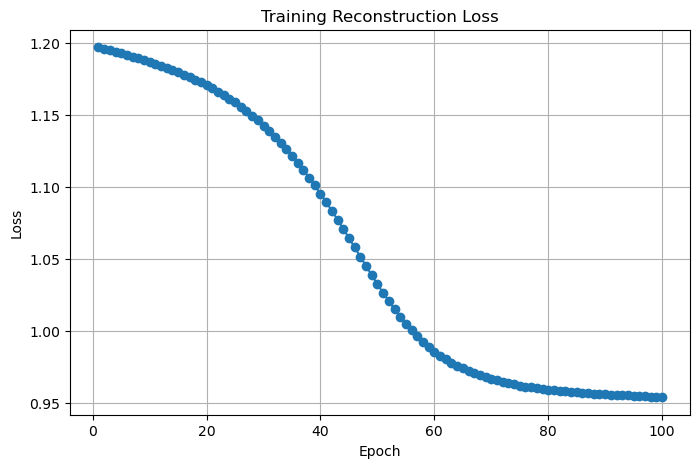

In [9]:
# Define Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder: compress input
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8)   # bottleneck (latent space)
        )
        
        # Decoder: reconstruct input
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim),
            nn.Sigmoid()   # keep outputs between 0 and 1 (since we scaled features)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(X_train_tensor.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

# Training loop
epochs = 100
train_losses = []

for epoch in range(epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = autoencoder(X_train_tensor)
    loss = criterion(outputs, X_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

# Plot training loss
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title("Training Reconstruction Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Reconstruction error threshold: 2.174328
AUC: 0.954
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     56863
         1.0       0.16      0.87      0.27       492

    accuracy                           0.96     57355
   macro avg       0.58      0.91      0.62     57355
weighted avg       0.99      0.96      0.97     57355



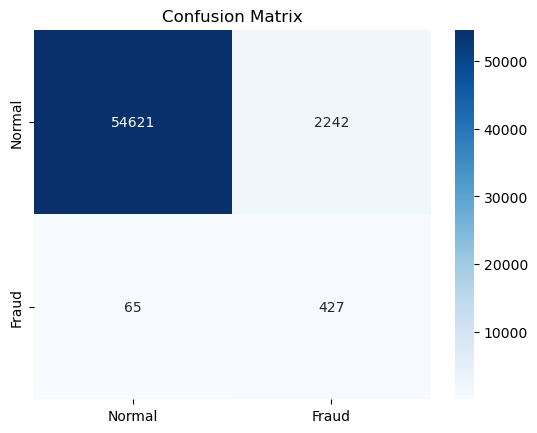

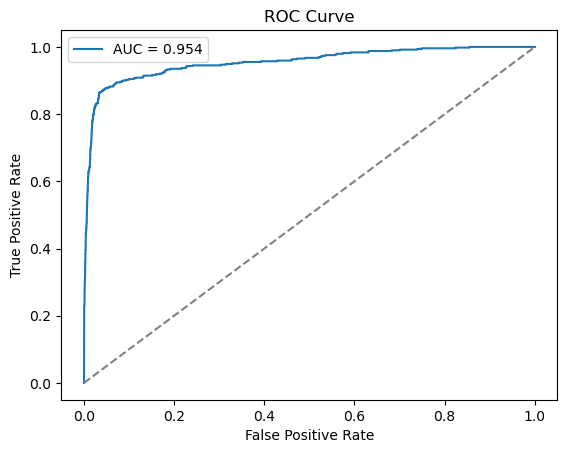

In [10]:
# Put model in evaluation mode
autoencoder.eval()

# Get reconstructions
with torch.no_grad():
    train_outputs = autoencoder(X_train_tensor)
    test_outputs  = autoencoder(X_test_tensor)

# Reconstruction errors
train_errors = torch.mean((train_outputs - X_train_tensor) ** 2, dim=1).cpu().numpy()
test_errors  = torch.mean((test_outputs - X_test_tensor) ** 2, dim=1).cpu().numpy()

# Use 96th percentile of train errors as threshold
threshold = np.percentile(train_errors, 96)
print(f"Reconstruction error threshold: {threshold:.6f}")

# Fraud prediction
y_pred = (test_errors > threshold).astype(int)

# ROC-AUC
auc = roc_auc_score(y_test, test_errors)
print(f"AUC: {auc:.3f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, test_errors)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Conclusion

This notebook demonstrates how a dense AutoEncoder can effectively detect anomalies in the **Credit Card Fraud Detection** dataset by learning to reconstruct normal transactions and flagging unusually high reconstruction errors as fraud.

- **Reconstruction Error Threshold**: 2.17
- **ROC-AUC**: 0.954, indicating excellent discrimination between fraud and non-fraud.
- **Accuracy**: 96% on the test set.
- **Recall (Fraud class)**: 87%, meaning the model successfully detects most fraudulent transactions.
- **Precision (Fraud class)**: 16%, showing that many flagged cases are false positives.
- **Confusion Matrix**:
  - Correctly identified **54,621 normal** and **427 fraud** transactions.
  - **2,242 normal** transactions **misclassified** as fraud (false positives).
  - **65 fraudulent** transactions **missed** (false negatives).

While the Autoencoder achieves strong fraud detection (high recall and AUC), its low precision indicates a tendency to raise many false alarms. This is common in fraud detection, where minimizing missed fraud (false negatives) is often prioritized over avoiding false positives.